## AI-Powered Fake News Detection

This project **aims to develop a robust AI system** capable of **distinguishing between authentic and fabricated news articles**. The project will leverage state-of-the-art machine learning and deep learning approaches, with transformer-based models showing the most promising results (achieving up to 99% accuracy in recent studies).

In [1]:
# Install Kaggle
!pip install kaggle  --quiet

In [2]:
# Upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ratneshsatyarthi","key":"5be9a35039521f973ae3062bf607f85d"}'}

In [3]:
# Create Kaggle directory
!mkdir -p ~/.kaggle
# Copy kaggle.json to Kaggle directory
!cp kaggle.json ~/.kaggle/

In [4]:
# View the path json file
!ls -ltr ~/.kaggle

total 4
-rw-r--r-- 1 root root 72 Oct 31 04:51 kaggle.json


In [5]:
# Give write permission
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List down all the compettion list from kaggle
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                  2025-11-03 23:59:00  Featured         1,000,000 Usd       1401           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       1588           False  
https://www.kaggle.com/competitions/csiro-biomass                                   2026-01-28 23:59:00  Research            75,000 Usd        276           False  
https://www.kaggle.com/competitions/recodai-luc-scientific-image-forgery-detection  2026-01-15 23:59:00  Research            55,000 Usd        226           False  
https://ww

In [7]:
# List all the dataset list ffrom Kaggle
!kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          16542        571  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          13426        335  1.0              
ayeshaimran123/social-media-and-mental-health-balance         Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           1038         29  1.0              
ahmadrazakashif

# **Task 1 : Dataset Analysis & Selection**

In [8]:
# List the dataset for CIFAKE
!kaggle datasets list -s Fake-News-Detection-Datasets

ref                                                                 title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
emineyetm/fake-news-detection-datasets                              Fake News Detection Datasets                          42975967  2022-12-07 11:45:17.723000          31742        120  0.5294118        
rmisra/news-headlines-dataset-for-sarcasm-detection                 News Headlines Dataset For Sarcasm Detection           3460534  2019-07-03 23:52:57.127000          58316       1039  1.0              
aadyasingh55/fake-news-classification                               Fake News Classification                              40851566  2024-10-22 13:22:42.387000           7220         74

In [9]:
# Download the dataset
!kaggle datasets download -d 'emineyetm/fake-news-detection-datasets' \
-p ../data/KaggleDatasetForRealFakeNewsDetection

Dataset URL: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
License(s): unknown
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 715MB/s]


In [10]:
# View the downloaded dataset
!ls -ltr ../data/KaggleDatasetForRealFakeNewsDetection

total 41972
-rw-r--r-- 1 root root 42975967 Dec  7  2022 fake-news-detection-datasets.zip


In [11]:
# Unzip the file
!unzip ../data/KaggleDatasetForRealFakeNewsDetection/fake-news-detection-datasets.zip \
-d ../data/KaggleDatasetForRealFakeNewsDetection

Archive:  ../data/KaggleDatasetForRealFakeNewsDetection/fake-news-detection-datasets.zip
  inflating: ../data/KaggleDatasetForRealFakeNewsDetection/News _dataset/Fake.csv  
  inflating: ../data/KaggleDatasetForRealFakeNewsDetection/News _dataset/True.csv  


In [12]:
# Give permission to unzipped file
!chmod 777 -R ../data/KaggleDatasetForRealFakeNewsDetection

In [13]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Step 1: Ensure all imports and basic setup
# Complete imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, EfficientNetB4
import cv2
from PIL import Image
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print("✓ All imports and setup completed")


TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✓ All imports and setup completed


**Load the Dataset**

In [15]:
import pandas as pd

# Set dataset path
DATASET_PATH = '/data/KaggleDatasetForRealFakeNewsDetection/News _dataset'

# Load True and Fake news datasets with correct paths
true_df = pd.read_csv(f'{DATASET_PATH}/True.csv')
fake_df = pd.read_csv(f'{DATASET_PATH}/Fake.csv')

# Add label columns
true_df['label'] = 0  # Real news
fake_df['label'] = 1  # Fake news

# Combine datasets and shuffle
df = pd.concat([true_df, fake_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)


In [16]:
df.head()

title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      1  
1       May 7, 2016      1  
2  December 3, 2016      1  
3  October 6, 2017       0  
4      Apr 25, 2017      1

In [17]:
df['title'][4]

'AZ RANCHERS Living On US-Mexico Border Destroy Nancy Pelosi’s Claim About Trump Being “Weak” For Wanting Border Wall [VIDEO]'

In [18]:
# Check the Shape
df.shape

(44898, 5)

In [19]:
# Check for Datatypes
print(df.dtypes)
print("----"*10)
# Check for total numerical columns and total categorical columns
print(df.dtypes.value_counts())

title      object
text       object
subject    object
date       object
label       int64
dtype: object
----------------------------------------
object    4
int64     1
Name: count, dtype: int64


In [20]:
# Check for NULL values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [21]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [22]:
# Check for any duplicate records

df.duplicated().sum()

np.int64(209)

In [23]:
# Get all duplicate rows (excluding the first occurrence)
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)


                                                   title  \
4896   Vietnam police arrest ex-politburo member over...   
5270   Jailed British-Iranian charity worker received...   
5721   Republicans unveil tax cut bill, but the hard ...   
7188   Sessions confirmed as U.S. attorney general af...   
8105   South Africa's ANC calls for nationalizing cen...   
...                                                  ...   
44551  China unveils new leadership line-up with no c...   
44810  Guatemala top court sides with U.N. graft unit...   
44836  Peru president, crying 'coup,' signals VPs wou...   
44870  Trump asks Supreme Court to block travel ban r...   
44893  Nigeria says U.S. agrees delayed $593 million ...   

                                                    text       subject  \
4896   HANOI (Reuters) - Vietnamese police on Friday ...     worldnews   
5270   BEIRUT (Reuters) - A British-Iranian charity w...     worldnews   
5721   WASHINGTON (Reuters) - U.S. House of Represent... 

In [24]:
# Dropping all the Duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [25]:
# Recheck for the Duplicates
df.duplicated().sum()

np.int64(0)

In [26]:
df.shape

(44689, 5)

# **Task 2: Exploratory Data Analysis**

In [27]:
# Check the value count of target column
df['label'].value_counts()

label
1    23478
0    21211
Name: count, dtype: int64

In [28]:
# Check the % of Target Column
df['label'].value_counts()/len(df)*100

label
1    52.536418
0    47.463582
Name: count, dtype: float64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

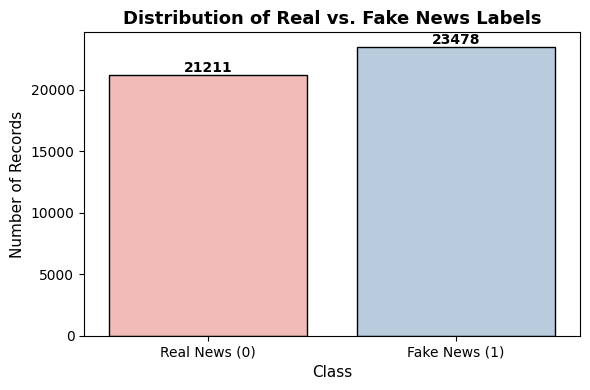

In [29]:
# Chech the Distribution of Target Variable

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df,
    x='label',
    palette='Pastel1',
    edgecolor='black'
)

# Set custom labels for clarity (for news detection task)
ax.set_xticklabels(['Real News (0)', 'Fake News (1)'])
plt.title("Distribution of Real vs. Fake News Labels", fontsize=13, weight='bold')
plt.xlabel("Class", fontsize=11)
plt.ylabel("Number of Records", fontsize=11)

# Annotate bars with absolute counts
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f"{count}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt


**Text Preprocessing**

In [30]:
# Download the missing resource using shell command
!python -m nltk.downloader punkt_tab

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

# Remove special characters (anything that is not a letter)
def remove_special_chars(message):
    return re.sub('[^a-zA-Z]', ' ', message)

# Convert to lowercase
def to_lowercase(message):
    return message.lower()

# Main clean_text function (removes URLs, HTML, non-alpha, tokenizes, removes stopwords, lemmatizes)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|<.*?>|[^a-zA-Z\s]", " ", str(text))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)

# Combine all steps into a single pipeline for the 'text' column
def full_clean_pipeline(message):
    message = remove_punctuation(message)
    message = remove_special_chars(message)
    message = to_lowercase(message)
    return clean_text(message)

# Apply to DataFrame (use your actual dataframe and column name, e.g., df['text'])
df['clean_text'] = df['text'].apply(full_clean_pipeline)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
# View the first 5 rows, including the cleaned column
print(df[['text', 'clean_text']].head())


                                                text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   

                                          clean_text  
0  donald trump white house chaos trying cover ru...  
1  donald trump presumptive gop nominee time reme...  
2  mike penny huge homophobe support exgay conver...  
3  san francisco reuters california attorney gene...  
4  twisted reasoning come pelosi day especially p...  


In [33]:
# View the Clean text
df[['text', 'clean_text']].head(10)

text  \
0  Donald Trump s White House is in chaos, and th...   
1  Now that Donald Trump is the presumptive GOP n...   
2  Mike Pence is a huge homophobe. He supports ex...   
3  SAN FRANCISCO (Reuters) - California Attorney ...   
4  Twisted reasoning is all that comes from Pelos...   
5  WASHINGTON (Reuters) - As a lawyer in private ...   
6  ADEN (Reuters) - A Salafist imam was shot dead...   
7  KUALA LUMPUR (Reuters) - Potential witnesses t...   
8   The goal of socialism is communism.  -Vladimi...   
9  Opposing views and beliefs has much of this co...   

                                          clean_text  
0  donald trump white house chaos trying cover ru...  
1  donald trump presumptive gop nominee time reme...  
2  mike penny huge homophobe support exgay conver...  
3  san francisco reuters california attorney gene...  
4  twisted reasoning come pelosi day especially p...  
5  washington reuters lawyer private practice dec...  
6  aden reuters salafist imam shot dead gunman ea...  
7  kuala lumpur reuters potential witness multibi...  
8  goal socialism communism vladimir lenin commun...  
9  opposing view belief much country heated feud ...

**Basic Stats & Visualizations**

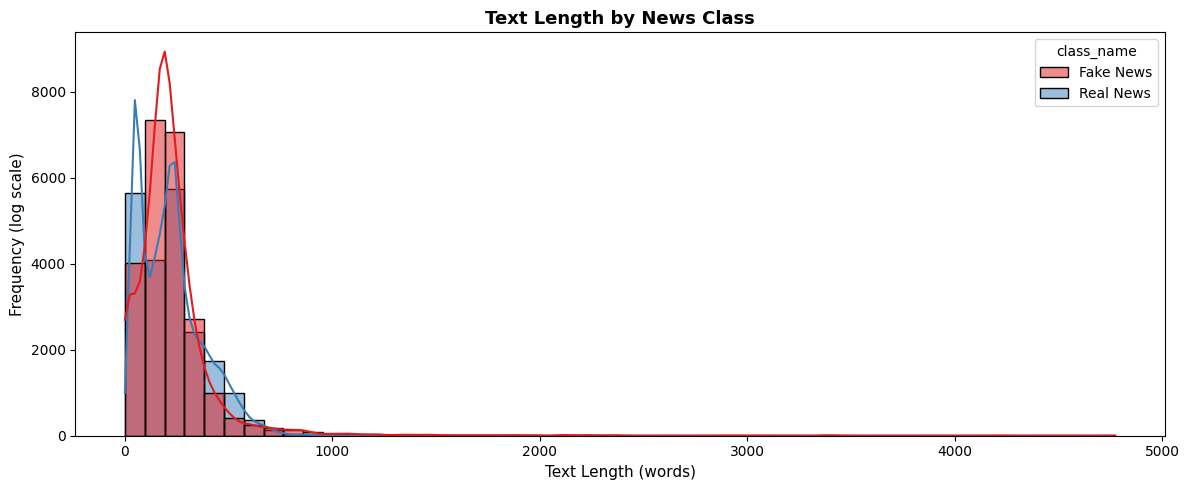

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare text length feature if not already present
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))

# Set custom class labels for legend
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

plt.figure(figsize=(12, 5))
sns.histplot(
    data=df,
    x='text_len',
    hue='class_name',
    bins=50,
    kde=True,
    palette='Set1',
    edgecolor='black'
)
#plt.yscale('log')
plt.title('Text Length by News Class', fontsize=13, weight='bold')
plt.xlabel('Text Length (words)', fontsize=11)
plt.ylabel('Frequency (log scale)', fontsize=11)
plt.tight_layout()
plt.show()


**Key Insights:**

- Both Fake News and Real News articles are usually short, with most texts falling below 400 words.

- Fake News tends to be even shorter on average than Real News, with their peak frequency at lower text lengths.

- The distribution is heavily right-skewed for both classes; long articles are rare in either group.

- Although both classes overlap significantly, Real News articles are slightly more likely to be longer than Fake News.

- Text length can provide useful but limited discriminatory power for fake news detection—short texts are more likely to be fake, but many short articles are also real.

In [35]:
import plotly.express as px

# Prepare text length and class name if not already present
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

fig = px.histogram(
    df,
    x='text_len',
    color='class_name',
    nbins=50,
    barmode='overlay',
    labels={'text_len': 'Text Length (words)', 'class_name': 'News Class'},
    title='Text Length by News Class'
)
fig.update_layout(
    xaxis_title='Text Length (words)',
    yaxis_title='Frequency',
    legend_title='News Class',
    bargap=0.05,
    width=900,
    height=400
)
#fig.update_xaxes(range=[0, 2000])    # For x axis
#fig.update_yaxes(range=[1, 1000])   # For y axis (remove if not log-scale)
fig.show()



In [36]:
import plotly.express as px

# Prepare text length and class name if not already present
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

fig = px.histogram(
    df,
    x='text_len',
    color='class_name',
    nbins=50,
    barmode='overlay',
    labels={'text_len': 'Text Length (words)', 'class_name': 'News Class'},
    title='Text Length by News Class'
)
fig.update_layout(
    xaxis_title='Text Length (words)',
    yaxis_title='Frequency (log scale)',
    legend_title='News Class',
    bargap=0.05,
    width=1100,
    height=500,
    yaxis_type="log"  # Set y-axis to log scale
)
fig.show()


**Insights from the Plot:**

- Both Fake News and Real News texts are predominantly short, with the highest frequencies below 500 words.

- Fake News (red) tends to concentrate more towards the shortest lengths, quickly decreasing in count as text length increases.

- Real News (blue) exhibits a relatively broader distribution, with noticeably more long articles (beyond 1000 words) compared to Fake News.

- The drop-off in frequency for both classes is steep, as shown by the log scale—these longer articles are rare for either class, but especially scarce for Fake News.

- For texts above ~1000 words, Real News dominates, with Fake News being almost absent among the longest articles.

**Summary:**

- Most news articles, whether fake or real, are short, but Fake News is typically even shorter than Real News.

- The chance of an article being Fake News decreases as its text length increases.

- Very long articles are overwhelmingly Real News, making text length a moderately useful feature for preliminary fake news detection.

**Wordclouds**

In [37]:
# Generate Word Cloud
from wordcloud import WordCloud

fake_words = ' '.join(df[df['label']==1]['clean_text'])
real_words = ' '.join(df[df['label']==0]['clean_text'])

WordCloud(width=800, height=400).generate(fake_words).to_image().show()
WordCloud(width=800, height=400).generate(real_words).to_image().show()


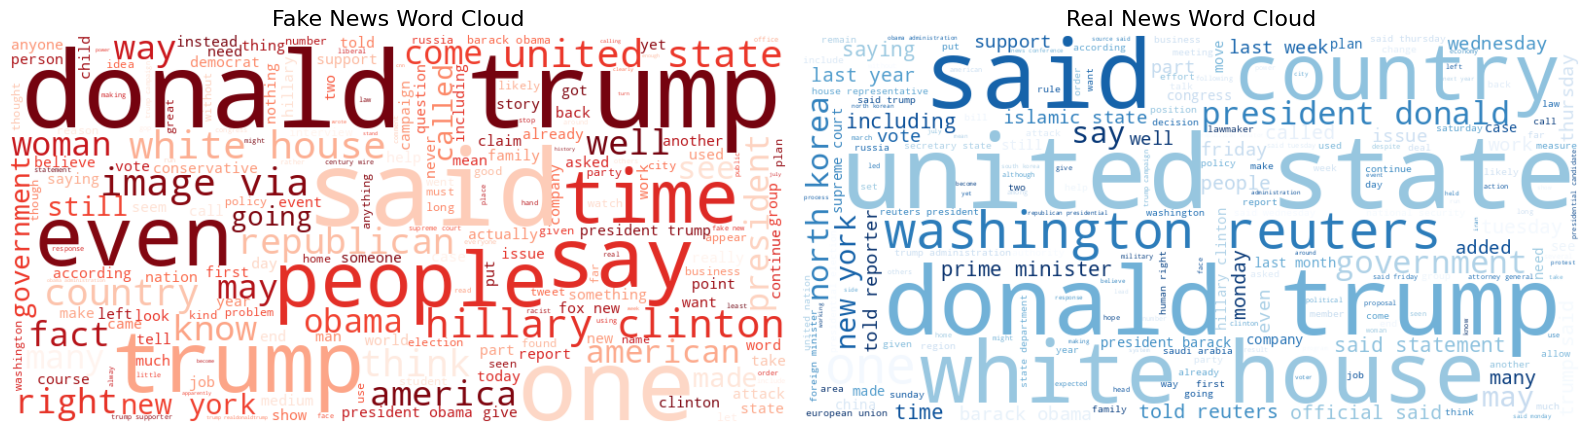

In [38]:
# Plot the Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get word strings for each class
fake_words = ' '.join(df[df['label'] == 1]['clean_text'])
real_words = ' '.join(df[df['label'] == 0]['clean_text'])

# Generate word clouds
fake_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_words)
real_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(real_words)

# Plot side by side
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud', fontsize=16)

plt.tight_layout()
plt.show()


**Summary of Word Cloud Result :**

**Fake News Content:**

- Dominated by political names (donald, trump, clinton, obama) and populist terms ("people", "government", "say").

- More subjective language and emotional or anecdotal phrasing are evident (words like “even”, “image”, “way”, "right", "woman").

- Indicates a tendency to focus on personalities, controversy, and populism in fake news narratives.

**Real News Content:**

- Strong use of journalistic conventions ("said", "reuters", "statement", "reported").

- Focused on official institutions and places ("united states", "white house", "president", "country").

- Communication style is more formal, factual, and source-oriented.

**Key Insights:**

- Both news types mention high-profile political figures, but fake news is more casual, sensational, and driven by personality and emotion.

- Real news maintains a more formal tone, referencing sources, quotations, and verifiable facts.

- Stylistic and vocabulary differences between fake and real news can serve as valuable features for classification algorithms.

**Sentiment Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'sentiment' and 'class_name' columns exist in df
# Sentiment calculation (already present in your code)
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

# Create horizontal boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(
    y="class_name",              # Class on y-axis (for horizontal boxplot)
    x="sentiment",               # Sentiment on x-axis
    data=df,
    hue="class_name",            # Color by class (optional)
    palette="Set2",
    showfliers=True              # Show outliers
)

# Hide legend
plt.legend().set_visible(False)

# Add axis labels and title
plt.xlabel("Sentiment Polarity")
plt.ylabel("News Class")
plt.title("Sentiment by News Class (Box Plot, Horizontal)")

plt.tight_layout()
plt.show()


In [39]:
# BOX Plot

import plotly.express as px
from textblob import TextBlob

# Sentiment calculation
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Class name mapping
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

# Horizontal boxplot with Plotly
fig = px.box(
    df,
    y="class_name",              # Flip: class on y-axis
    x="sentiment",               # sentiment on x-axis
    color="class_name",
    labels={"class_name": "News Class", "sentiment": "Sentiment Polarity"},
    title="Sentiment by News Class (Box Plot, Horizontal)"
)
fig.update_layout(showlegend=False, width=1200, height=500)
fig.show()


**Key Insights from the Sentiment Polarity Box Plot by News Class:**

- **Sentiment Polarity Median:**

  - Both Fake News and Real News have median sentiment polarity values very close to neutral (0), indicating that overall, most articles in either class use neutral language.

- **Distribution Spread:**

  - The sentiment scores for both news classes are distributed broadly across the negative to positive spectrum (almost the full range from -1 to +1), but the interquartile range (the box width) is fairly narrow and centered around zero.

  - **Outliers:** There are several outliers for both classes in both negative and positive directions—some articles in both groups are strongly negative or positive in tone.

**Comparison of Classes:**

- Real News shows a slight bias toward positive sentiment, as indicated by a somewhat right-shifted box, but it's very subtle.

- Fake News has a similar spread, with a slight indication of more negative or neutral texts.

**Overlap:**

- There is substantial overlap in the sentiment polarity of Fake and Real News, suggesting that sentiment alone is not a strong discriminator between the two classes.

**Summary:**

- Both Fake News and Real News tend to be written in a neutral tone.

- There are articles with both highly negative and positive sentiment in each class.

- Sentiment polarity, by itself, is not a strong feature for distinguishing fake from real news, but may be helpful in combination with other textual and structural features.

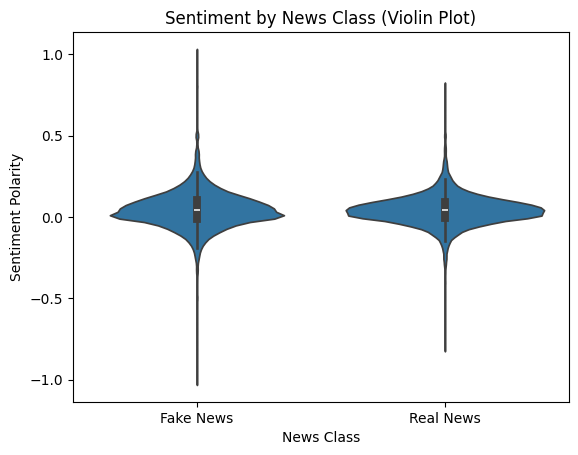

In [40]:
# Plot the VIOLIN Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Define and map class names for clarity
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

sns.violinplot(x='class_name', y='sentiment', data=df)
plt.title('Sentiment by News Class (Violin Plot)')
plt.xlabel('News Class')
plt.ylabel('Sentiment Polarity')
plt.show()


**Key Insights from the Sentiment by News Class (Violin Plot):**

**Neutral Sentiment Dominates:**

- Both Fake News and Real News articles show a strong concentration around neutral sentiment polarity (close to 0), indicated by the thickness of the plot at the center.

**Similar Distribution Shapes:**

- The violin shapes for both classes are nearly identical, meaning the overall sentiment distribution in fake and real news is very similar.

**Spread and Outliers:**

- There are tails stretching toward positive and negative polarity, showing that some articles in both groups have extreme sentiment. However, these are much less frequent.

**Lack of Discriminative Power:**

- Minimal difference in spread or centroid between Fake News and Real News, suggesting sentiment polarity alone does not effectively distinguish between the two classes.

**Summary:**

- The majority of both fake and real news articles use neutral language, with only a few examples expressing strong positive or negative sentiment.

- The sentiment distributions of Fake News and Real News are highly overlapping and nearly identical.

- Sentiment polarity, as visualized in the violin plot, offers little power for direct classification of news as real or fake and is best used in combination with other features.

In [41]:
import plotly.express as px

class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

fig = px.violin(
    df,
    x="class_name",
    y="sentiment",
    color="class_name",
    box=True,  # Show box plot inside violin
    points="all",  # Show all points
    labels={"class_name": "News Class", "sentiment": "Sentiment Polarity"},
    title="Sentiment by News Class (Violin Plot)"
)
fig.update_layout(showlegend=False, width=1200, height=500)
fig.show()


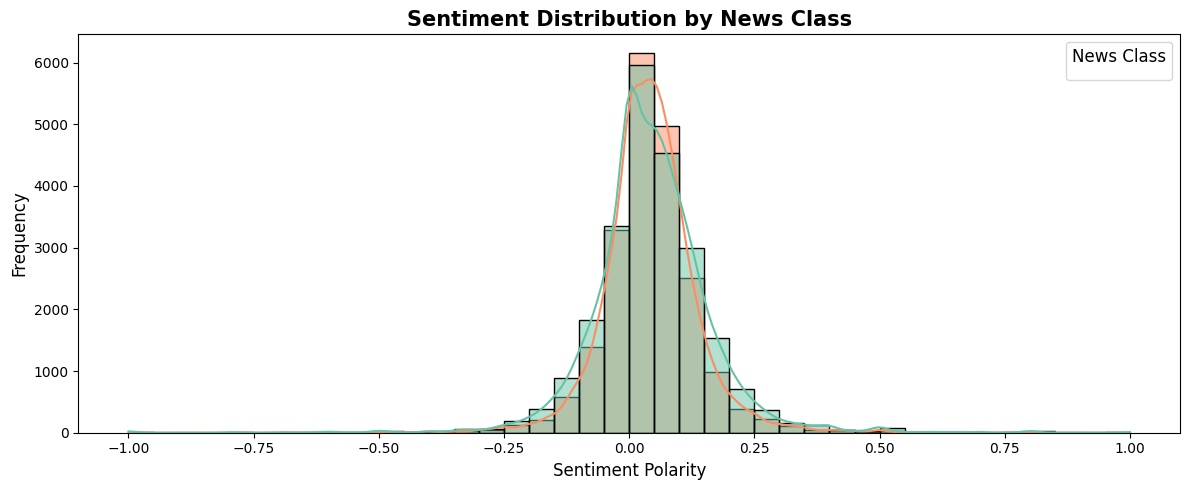

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map label to class name
class_names = {0: "Real News", 1: "Fake News"}
df['class_name'] = df['label'].map(class_names)

plt.figure(figsize=(12, 5))  # Increased chart size
sns.histplot(
    data=df,
    x='sentiment',
    hue='class_name',
    bins=40,
    kde=True,
    palette='Set2'
)
plt.title('Sentiment Distribution by News Class', fontsize=15, weight='bold')
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='News Class', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()


**Key Insights from the Sentiment Distribution by News Class Histogram:**

**Centered Around Neutral:**

  - The vast majority of both Fake News and Real News articles have sentiment polarity scores very close to zero (neutral), indicating that most news articles—regardless of class—are written in a neutral tone.

**Sharp Peak and Symmetry:**

  - The distributions for both classes are sharply peaked around zero and decrease rapidly as polarity moves towards either negative or positive extremes.

  - The histogram exhibits a nearly normal (bell-shaped) distribution, suggesting consistency in sentiment style across classes.

**Overlap:**

  - There is substantial overlap between Fake and Real News sentiment distributions. Both follow almost the same trend, and neither class dominates a particular sentiment polarity region.

**Few Extreme Sentiments:**

  - Very few articles in either class show highly negative (< -0.5) or highly positive (> +0.5) sentiment. These are rare outliers.

  - The most negative and positive sentiments are minimal, emphasizing that extreme sentiment is uncommon in both classes.

**Summary:**

- Sentiment polarity alone does not differentiate Fake News from Real News, as both tend to be neutral and exhibit highly overlapping sentiment distributions.

- The strong imbalance towards neutrality suggests that news—whether fake or real—rarely expresses strong emotional bias, further confirming the need to use additional features for effective classification.

# **Task 3 : Feature Extraction**

**1. Bag-of-Words and TF-IDF**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [44]:
# Check shape of transformed data (number of samples x number of features)
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)

X_train_tfidf shape: (35751, 10000)
X_test_tfidf shape: (8938, 10000)


In [45]:
# View a few rows (first 5) of the TF-IDF matrix as dense array (not recommended for large datasets)
print(X_train_tfidf[:5].toarray())  # first 5 records, as dense array

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# View feature names (words/phrases included)
print("Feature names:", tfidf.get_feature_names_out()[:20])  # first 20 features

Feature names: ['aaron' 'abadi' 'abandon' 'abandoned' 'abandoning' 'abbas' 'abbott' 'abc'
 'abc news' 'abc week' 'abdel' 'abdullah' 'abe' 'abedin' 'abide' 'ability'
 'able' 'able get' 'aboard' 'abolish']


In [47]:
# Check sample values for a single record
sample_idx = 0
print("TF-IDF vector for sample", sample_idx, ":", X_train_tfidf[sample_idx].toarray())

TF-IDF vector for sample 0 : [[0. 0. 0. ... 0. 0. 0.]]


In [48]:
# If you want a DataFrame view for the first few rows:
import pandas as pd
tfidf_df = pd.DataFrame(X_train_tfidf[:5].toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())

   aaron  abadi  abandon  abandoned  abandoning  abbas  abbott  abc  abc news  \
0    0.0    0.0      0.0        0.0         0.0    0.0     0.0  0.0       0.0   
1    0.0    0.0      0.0        0.0         0.0    0.0     0.0  0.0       0.0   
2    0.0    0.0      0.0        0.0         0.0    0.0     0.0  0.0       0.0   
3    0.0    0.0      0.0        0.0         0.0    0.0     0.0  0.0       0.0   
4    0.0    0.0      0.0        0.0         0.0    0.0     0.0  0.0       0.0   

   abc week  ...  zeid  zero  zika  zika virus  zimbabwe  zimbabwean  zinke  \
0       0.0  ...   0.0   0.0   0.0         0.0       0.0         0.0    0.0   
1       0.0  ...   0.0   0.0   0.0         0.0       0.0         0.0    0.0   
2       0.0  ...   0.0   0.0   0.0         0.0       0.0         0.0    0.0   
3       0.0  ...   0.0   0.0   0.0         0.0       0.0         0.0    0.0   
4       0.0  ...   0.0   0.0   0.0         0.0       0.0         0.0    0.0   

   zone  zuckerberg  zuma  
0   0.0   

# **Task 4 : Model Building and Evaluation**

### **MACHINE LEARNING Models**

In [49]:
# Import the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**1. Logistic Regression**

In [50]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [51]:
# Fitting the dataset to Linear Regression Model

lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# Making Prediction on (80%)training data of Input variable/ Features

X_train_tfidf_pred_log = lr.predict(X_train_tfidf)

In [53]:
# Making Prediction on (20%)testing data of Input variable/ Features

X_test_tfidf_pred_log = lr.predict(X_test_tfidf)

In [54]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

print("="*35)
print("      Training Set Evaluation")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_train, X_train_tfidf_pred_log)))
print("Precision: {:.3f}".format(precision_score(y_train, X_train_tfidf_pred_log)))
print("Recall: {:.3f}".format(recall_score(y_train, X_train_tfidf_pred_log)))
print("F1-score: {:.3f}".format(f1_score(y_train, X_train_tfidf_pred_log)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_train, lr.predict_proba(X_train_tfidf)[:,1])))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_train, X_train_tfidf_pred_log, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_train, X_train_tfidf_pred_log))
print("="*35 + "\n")


      Training Set Evaluation
Accuracy: 0.992
Precision: 0.994
Recall: 0.990
F1-score: 0.992
ROC-AUC: 0.999

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.989     0.993     0.991     16997
           1      0.994     0.990     0.992     18754

    accuracy                          0.992     35751
   macro avg      0.992     0.992     0.992     35751
weighted avg      0.992     0.992     0.992     35751

------------------------------
Confusion Matrix
------------------------------
[[16883   114]
 [  182 18572]]



In [55]:
# Print the Evaluation Metrics and Confusion Matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

print("="*35)
print("      Test Set Evaluation")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, X_test_tfidf_pred_log)))
print("Precision: {:.3f}".format(precision_score(y_test, X_test_tfidf_pred_log)))
print("Recall: {:.3f}".format(recall_score(y_test, X_test_tfidf_pred_log)))
print("F1-score: {:.3f}".format(f1_score(y_test, X_test_tfidf_pred_log)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test, lr.predict_proba(X_test_tfidf)[:,1])))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test, X_test_tfidf_pred_log, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test, X_test_tfidf_pred_log))
print("="*35 + "\n")


      Test Set Evaluation
Accuracy: 0.987
Precision: 0.990
Recall: 0.985
F1-score: 0.987
ROC-AUC: 0.999

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.983     0.989     0.986      4214
           1      0.990     0.985     0.987      4724

    accuracy                          0.987      8938
   macro avg      0.987     0.987     0.987      8938
weighted avg      0.987     0.987     0.987      8938

------------------------------
Confusion Matrix
------------------------------
[[4167   47]
 [  71 4653]]



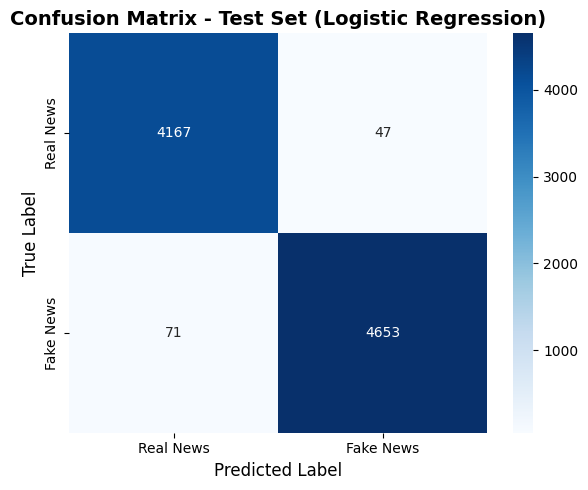

In [56]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, X_test_tfidf_pred_log)

# Define class names
class_names = ['Real News', 'Fake News']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set (Logistic Regression)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


**2. Naive Bayes**

In [57]:
# Import Naive Bayes

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [58]:
# Fitting the dataset to Naive Bayes

nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [59]:
# Making Prediction on (80%)training data of Input variable/ Features

X_train_tfidf_pred_nb = lr.predict(X_train_tfidf)

In [60]:
# Making Prediction on (20%)testing data of Input variable/ Features

X_test_tfidf_pred_nb = lr.predict(X_test_tfidf)

In [61]:
# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# TRAINING DATA
print("="*35)
print("      Training Set Evaluation (Naive Bayes)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_train, X_train_tfidf_pred_nb)))
print("Precision: {:.3f}".format(precision_score(y_train, X_train_tfidf_pred_nb)))
print("Recall: {:.3f}".format(recall_score(y_train, X_train_tfidf_pred_nb)))
print("F1-score: {:.3f}".format(f1_score(y_train, X_train_tfidf_pred_nb)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_train, nb.predict_proba(X_train_tfidf)[:,1])))
print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_train, X_train_tfidf_pred_nb, digits=3))
print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_train, X_train_tfidf_pred_nb))
print("="*35 + "\n")

      Training Set Evaluation (Naive Bayes)
Accuracy: 0.992
Precision: 0.994
Recall: 0.990
F1-score: 0.992
ROC-AUC: 0.986

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.989     0.993     0.991     16997
           1      0.994     0.990     0.992     18754

    accuracy                          0.992     35751
   macro avg      0.992     0.992     0.992     35751
weighted avg      0.992     0.992     0.992     35751

------------------------------
Confusion Matrix
------------------------------
[[16883   114]
 [  182 18572]]



In [62]:
# TESTING DATA
print("="*35)
print("      Test Set Evaluation (Naive Bayes)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, X_test_tfidf_pred_nb)))
print("Precision: {:.3f}".format(precision_score(y_test, X_test_tfidf_pred_nb)))
print("Recall: {:.3f}".format(recall_score(y_test, X_test_tfidf_pred_nb)))
print("F1-score: {:.3f}".format(f1_score(y_test, X_test_tfidf_pred_nb)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test, nb.predict_proba(X_test_tfidf)[:,1])))
print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test, X_test_tfidf_pred_nb, digits=3))
print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test, X_test_tfidf_pred_nb))
print("="*35 + "\n")

      Test Set Evaluation (Naive Bayes)
Accuracy: 0.987
Precision: 0.990
Recall: 0.985
F1-score: 0.987
ROC-AUC: 0.983

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.983     0.989     0.986      4214
           1      0.990     0.985     0.987      4724

    accuracy                          0.987      8938
   macro avg      0.987     0.987     0.987      8938
weighted avg      0.987     0.987     0.987      8938

------------------------------
Confusion Matrix
------------------------------
[[4167   47]
 [  71 4653]]



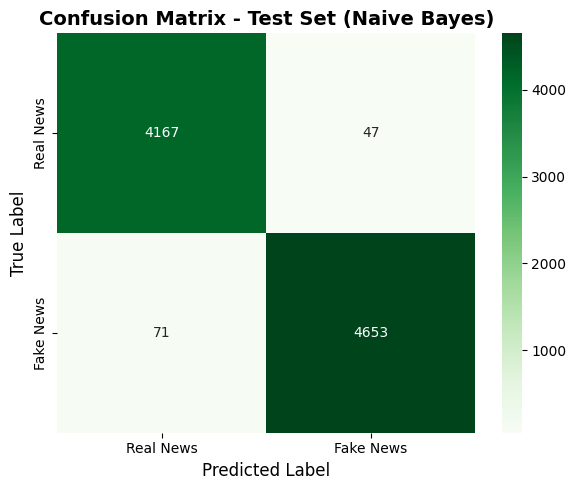

In [63]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, X_test_tfidf_pred_nb)

# Define class names
class_names = ['Real News', 'Fake News']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set (Naive Bayes)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


### **DEEP LEARNING Models**

**Text Preprocessing and Tokenization**

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Parameters
max_words = 10000
max_len = 200

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [69]:
# Converts text data into padded numerical sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [70]:
# Label Prep
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)


### **CNN**

In [71]:
#CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization

cnn_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 5, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(128, 7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Force-build: supply the batch size (None for flexible), and sequence length (input shape from preprocessing/pad_sequences)
cnn_model.build(input_shape=(None, max_len))


In [72]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 200, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 200, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 200, 128)       │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537,537 (5.87 MB)

 Trainable params: 1,537,025 (5.86 MB)

 Non-trainable params: 512 (2.00 KB)

In [73]:
# For sequence models (CNN on text)
# X_train_pad, y_train_arr = your padded train features and labels
# X_test_pad, y_test_arr = your padded test features and labels

history = cnn_model.fit(
    X_train_pad,               # shape: (num_samples, max_len)
    y_train_arr,               # shape: (num_samples,)
    epochs=10,                 # you can change epochs to 30 for larger datasets
    batch_size=128,            # adjust as per memory/GPU
    validation_data=(X_test_pad, y_test_arr),  # validation split
    verbose=1
)


Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7328 - loss: 0.5467 - val_accuracy: 0.6762 - val_loss: 0.4938
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9941 - loss: 0.0252 - val_accuracy: 0.9970 - val_loss: 0.0164
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.9978 - val_loss: 0.0158
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9944 - val_loss: 0.0353
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9944 - val_loss: 0.0274
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9977 - val_loss: 0.0126
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9981 - val_loss: 0.0185
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9995 - loss: 0.0021 - val_acc

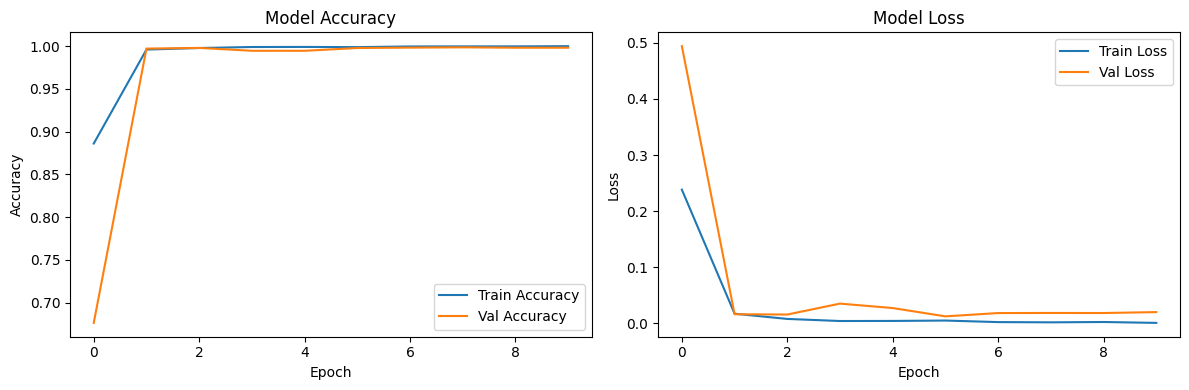

In [74]:
# Plot Training and Validation Graph

import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Key Insights:**

**Accuracy Insights**
- The accuracy for both training and validation increases rapidly and stabilizes near 100% within the first couple of epochs.

- The near-identical curves for training and validation suggest that the model generalizes well without significant overfitting.​

**Loss Insights**
- Both training and validation loss decrease sharply in the first epoch and remain low for the rest of the epochs.

- The loss values are consistently low, further indicating effective learning and model fit.

- There is no sign of divergence or oscillation between training and validation loss, which means there is no evident underfitting or instability.​

**CNN Performance Conclusion**
- The CNN achieves almost perfect accuracy on both training and validation sets, and loss values are minimal after the first epoch, indicating strong and stable learning.

- The close alignment of train and validation metrics implies the CNN is not overfitting and is likely trained on representative and sufficiently large data.

These trends indicate that the **model is well-optimized** for the given dataset, showing both **high performance and robust generalization ability**.​

In [76]:
'''from sklearn.metrics import classification_report

print(classification_report(y_test_arr, y_pred_cnn_label, digits=3))'''


'from sklearn.metrics import classification_report\n\nprint(classification_report(y_test_arr, y_pred_cnn_label, digits=3))'

In [77]:
# Print the Evaluation Metrics and Confusion Matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# Predict test labels
y_pred_cnn = cnn_model.predict(X_test_pad)
y_pred_cnn_label = (y_pred_cnn.flatten() > 0.5).astype(int)  # threshold for classification

# Print main metrics
print("="*35)
print("      Test Set Evaluation (CNN)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test_arr, y_pred_cnn_label)))
print("Precision: {:.3f}".format(precision_score(y_test_arr, y_pred_cnn_label)))
print("Recall: {:.3f}".format(recall_score(y_test_arr, y_pred_cnn_label)))
print("F1-score: {:.3f}".format(f1_score(y_test_arr, y_pred_cnn_label)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test_arr, y_pred_cnn.flatten())))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test_arr, y_pred_cnn_label, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test_arr, y_pred_cnn_label))
print("="*35 + "\n")


280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
      Test Set Evaluation (CNN)
Accuracy: 0.998
Precision: 0.998
Recall: 0.998
F1-score: 0.998
ROC-AUC: 1.000

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.998     0.998     0.998      4214
           1      0.998     0.998     0.998      4724

    accuracy                          0.998      8938
   macro avg      0.998     0.998     0.998      8938
weighted avg      0.998     0.998     0.998      8938

------------------------------
Confusion Matrix
------------------------------
[[4205    9]
 [   9 4715]]



280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


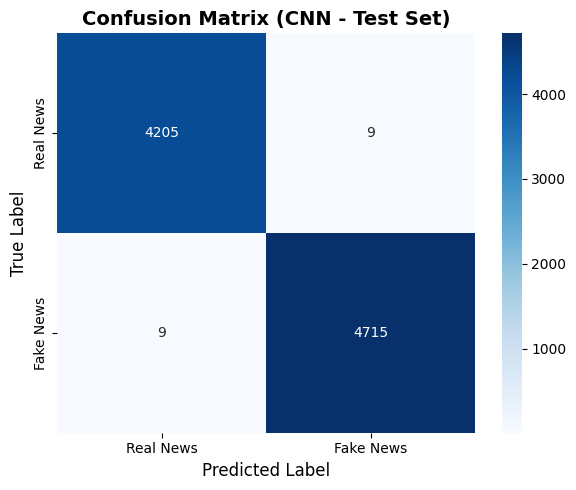

In [78]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict with your trained CNN model
y_pred_cnn = cnn_model.predict(X_test_pad)
y_pred_cnn_label = (y_pred_cnn.flatten() > 0.5).astype(int)  # threshold for binary classification

# Compute confusion matrix
cm = confusion_matrix(y_test_arr, y_pred_cnn_label)
class_names = ['Real News', 'Fake News']  # adjust as per your problem

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (CNN - Test Set)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [79]:
# Plot Training and Validation Graph

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Accuracy plot
fig.add_trace(go.Scatter(
    y=history.history['accuracy'], x=list(range(1, len(history.history['accuracy']) + 1)),
    mode='lines+markers', name='Train Accuracy'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'], x=list(range(1, len(history.history['val_accuracy']) + 1)),
    mode='lines+markers', name='Val Accuracy'
), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(
    y=history.history['loss'], x=list(range(1, len(history.history['loss']) + 1)),
    mode='lines+markers', name='Train Loss'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'], x=list(range(1, len(history.history['val_loss']) + 1)),
    mode='lines+markers', name='Val Loss'
), row=1, col=2)

# Update figure layout
fig.update_layout(
    title='Training & Validation Metrics',
    xaxis_title='Epoch',
    yaxis_title='Value',
    legend=dict(x=0.5, y=-0.2, orientation='h'),
    width=1100,
    height=500
)
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()


### **LSTM**

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Force-build to show correct output shapes and param counts
lstm_model.build(input_shape=(None, max_len))
lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,467,777 (5.60 MB)

 Trainable params: 1,467,521 (5.60 MB)

 Non-trainable params: 256 (1.00 KB)

In [81]:
# Train the Model

history = lstm_model.fit(
    X_train_pad,              # shape: (num_samples, max_len)
    y_train_arr,              # shape: (num_samples,)
    epochs=10,                # increase epochs for larger datasets or complex models
    batch_size=128,           # tune as per memory/GPU availability
    validation_data=(X_test_pad, y_test_arr),  # validation set for early stopping
    verbose=1
)


Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7521 - loss: 0.4826 - val_accuracy: 0.8775 - val_loss: 0.3270
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8857 - loss: 0.3194 - val_accuracy: 0.8597 - val_loss: 0.3521
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8944 - loss: 0.2719 - val_accuracy: 0.9917 - val_loss: 0.0421
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9928 - loss: 0.0407 - val_accuracy: 0.9942 - val_loss: 0.0332
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0310 - val_accuracy: 0.9949 - val_loss: 0.0293
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9957 - loss: 0.0274 - val_accuracy: 0.9957 - val_loss: 0.0238
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9962 - loss: 0.0240 - val_accuracy: 0.9957 - val_loss: 0.0245
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9964 - loss: 0.0224 - val_ac

In [82]:
# Print the Evaluation Metrics and Confusion Matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# Predict test labels for LSTM
y_pred_lstm = lstm_model.predict(X_test_pad)
y_pred_lstm_label = (y_pred_lstm.flatten() > 0.5).astype(int)  # threshold for binary classification

# Print main metrics
print("="*35)
print("      Test Set Evaluation (LSTM)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test_arr, y_pred_lstm_label)))
print("Precision: {:.3f}".format(precision_score(y_test_arr, y_pred_lstm_label)))
print("Recall: {:.3f}".format(recall_score(y_test_arr, y_pred_lstm_label)))
print("F1-score: {:.3f}".format(f1_score(y_test_arr, y_pred_lstm_label)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test_arr, y_pred_lstm.flatten())))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test_arr, y_pred_lstm_label, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test_arr, y_pred_lstm_label))
print("="*35 + "\n")


280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
      Test Set Evaluation (LSTM)
Accuracy: 0.996
Precision: 0.993
Recall: 0.999
F1-score: 0.996
ROC-AUC: 0.997

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.999     0.992     0.995      4214
           1      0.993     0.999     0.996      4724

    accuracy                          0.996      8938
   macro avg      0.996     0.995     0.996      8938
weighted avg      0.996     0.996     0.996      8938

------------------------------
Confusion Matrix
------------------------------
[[4179   35]
 [   5 4719]]



280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


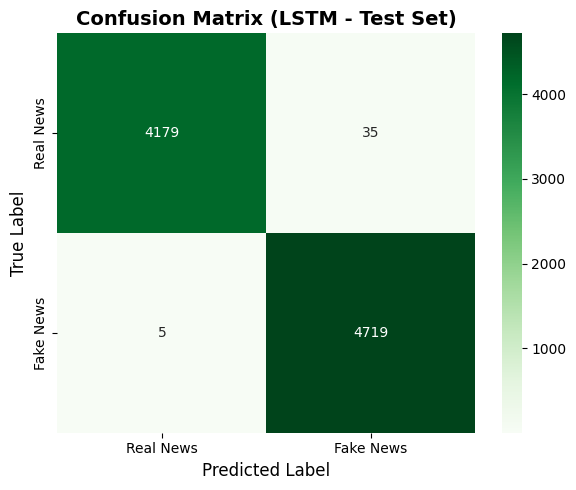

In [83]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict with your trained LSTM model
y_pred_lstm = lstm_model.predict(X_test_pad)
y_pred_lstm_label = (y_pred_lstm.flatten() > 0.5).astype(int)  # threshold for binary classification

# Compute confusion matrix
cm = confusion_matrix(y_test_arr, y_pred_lstm_label)
class_names = ['Real News', 'Fake News']  # adjust as per your labels

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (LSTM - Test Set)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [84]:
# Plot Training and Validation Graph

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Accuracy plot
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    x=list(range(1, len(history.history['accuracy']) + 1)),
    mode='lines+markers', name='Train Accuracy'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    mode='lines+markers', name='Val Accuracy'
), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    x=list(range(1, len(history.history['loss']) + 1)),
    mode='lines+markers', name='Train Loss'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    x=list(range(1, len(history.history['val_loss']) + 1)),
    mode='lines+markers', name='Val Loss'
), row=1, col=2)

# Update figure layout
fig.update_layout(
    title='Training & Validation Metrics (LSTM)',
    xaxis_title='Epoch',
    yaxis_title='Value',
    legend=dict(x=0.5, y=-0.2, orientation='h'),
    width=1100,
    height=500
)
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()


### **BiLSTMs**

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

bilstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.25, recurrent_dropout=0.25)),  # Dropout in LSTM
    BatchNormalization(),           # normalize after main sequence extraction
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.25, recurrent_dropout=0.25)),
    Dropout(0.5),                   # regularization
    Dense(128, activation='relu'),  # increased neuron count for richer representations
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),           # stabilize dense layer outputs
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Force-build for summary
bilstm_model.build(input_shape=(None, max_len))
bilstm_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729,345 (6.60 MB)

 Trainable params: 1,728,769 (6.59 MB)

 Non-trainable params: 576 (2.25 KB)

In [86]:
# Optional: Early stopping for best weights
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [87]:
# Train the model
history = bilstm_model.fit(
    X_train_pad, y_train_arr,
    batch_size=128,
    epochs=12,
    validation_data=(X_test_pad, y_test_arr),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/12
280/280 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.9044 - loss: 0.1958 - val_accuracy: 0.9906 - val_loss: 0.1441
Epoch 2/12
280/280 ━━━━━━━━━━━━━━━━━━━━ 672s 2s/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 0.9981 - val_loss: 0.0083
Epoch 3/12
280/280 ━━━━━━━━━━━━━━━━━━━━ 661s 2s/step - accuracy: 0.9993 - loss: 0.0051 - val_accuracy: 0.9983 - val_loss: 0.0115
Epoch 4/12
280/280 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9982 - val_loss: 0.0111


In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = bilstm_model.fit(
    X_train_pad,            # Padded input sequences for training
    y_train_arr,            # Labels (0/1)
    batch_size=128,         # Adjust for your hardware
    epochs=15,              # More epochs for deeper model
    validation_data=(X_test_pad, y_test_arr),
    callbacks=[early_stop], # Stops training when validation loss stops improving
    verbose=1
)


Epoch 1/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 657s 2s/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9982 - val_loss: 0.0105
Epoch 2/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9987 - val_loss: 0.0096
Epoch 3/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 659s 2s/step - accuracy: 0.9999 - loss: 9.9521e-04 - val_accuracy: 0.9988 - val_loss: 0.0117
Epoch 4/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 1.0000 - loss: 4.1450e-04 - val_accuracy: 0.9984 - val_loss: 0.0130
Epoch 5/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.9999 - loss: 5.4660e-04 - val_accuracy: 0.9980 - val_loss: 0.0138


In [89]:
# Print the Evaluation Metrics and Confusion Matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# Predict test labels for BiLSTM
y_pred_bilstm = bilstm_model.predict(X_test_pad)
y_pred_bilstm_label = (y_pred_bilstm.flatten() > 0.5).astype(int)  # threshold for binary classification

# Print main metrics
print("="*35)
print("      Test Set Evaluation (BiLSTM)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test_arr, y_pred_bilstm_label)))
print("Precision: {:.3f}".format(precision_score(y_test_arr, y_pred_bilstm_label)))
print("Recall: {:.3f}".format(recall_score(y_test_arr, y_pred_bilstm_label)))
print("F1-score: {:.3f}".format(f1_score(y_test_arr, y_pred_bilstm_label)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test_arr, y_pred_bilstm.flatten())))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test_arr, y_pred_bilstm_label, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test_arr, y_pred_bilstm_label))
print("="*35 + "\n")


280/280 ━━━━━━━━━━━━━━━━━━━━ 118s 417ms/step
      Test Set Evaluation (BiLSTM)
Accuracy: 0.999
Precision: 0.998
Recall: 0.999
F1-score: 0.999
ROC-AUC: 1.000

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.999     0.998     0.999      4214
           1      0.998     0.999     0.999      4724

    accuracy                          0.999      8938
   macro avg      0.999     0.999     0.999      8938
weighted avg      0.999     0.999     0.999      8938

------------------------------
Confusion Matrix
------------------------------
[[4205    9]
 [   3 4721]]



280/280 ━━━━━━━━━━━━━━━━━━━━ 116s 413ms/step


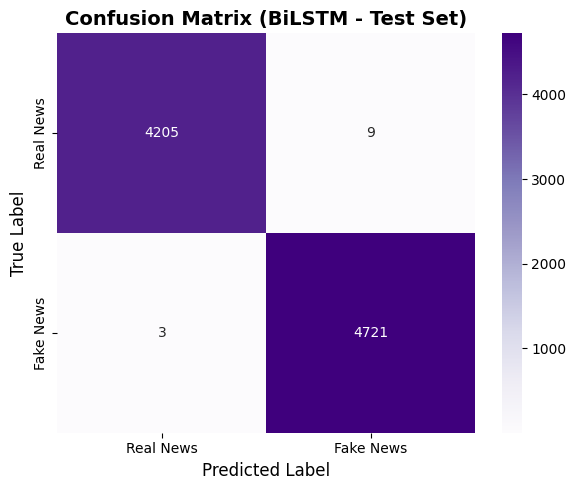

In [90]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict with your trained BiLSTM model
y_pred_bilstm = bilstm_model.predict(X_test_pad)
y_pred_bilstm_label = (y_pred_bilstm.flatten() > 0.5).astype(int)  # threshold for binary classification

# Compute confusion matrix
cm = confusion_matrix(y_test_arr, y_pred_bilstm_label)
class_names = ['Real News', 'Fake News']  # Adjust as per your label order

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (BiLSTM - Test Set)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [91]:
# Plot Training and Validation Graph

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Replace `history` with your BiLSTM training history object
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Accuracy plot
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    x=list(range(1, len(history.history['accuracy']) + 1)),
    mode='lines+markers', name='Train Accuracy'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    mode='lines+markers', name='Val Accuracy'
), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    x=list(range(1, len(history.history['loss']) + 1)),
    mode='lines+markers', name='Train Loss'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    x=list(range(1, len(history.history['val_loss']) + 1)),
    mode='lines+markers', name='Val Loss'
), row=1, col=2)

fig.update_layout(
    title='Training & Validation Metrics (BiLSTM)',
    xaxis_title='Epoch',
    yaxis_title='Value',
    legend=dict(x=0.5, y=-0.2, orientation='h'),
    width=1100,
    height=500
)
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()


### **Hard Voting Ensemble**

In [94]:
import numpy as np

# Each model predicts binary labels (0/1)
y_pred_nb     = nb.predict(X_test_tfidf)      # Naive Bayes
y_pred_lr     = lr.predict(X_test_tfidf)  # Logistic Regression
y_pred_cnn    = (cnn_model.predict(X_test_pad).flatten() > 0.5).astype(int)
y_pred_lstm   = (lstm_model.predict(X_test_pad).flatten() > 0.5).astype(int)
y_pred_bilstm = (bilstm_model.predict(X_test_pad).flatten() > 0.5).astype(int)

# Stack predictions horizontally
y_preds = np.column_stack([y_pred_nb, y_pred_lr, y_pred_cnn, y_pred_lstm, y_pred_bilstm])

# Hard voting: majority class selected
y_pred_voting = (np.mean(y_preds, axis=1) > 0.5).astype(int)


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 125s 445ms/step


In [95]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# For hard voting
print("="*35)
print("      Test Set Evaluation (Hard Voting Ensemble)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test_arr, y_pred_voting)))
print("Precision: {:.3f}".format(precision_score(y_test_arr, y_pred_voting)))
print("Recall: {:.3f}".format(recall_score(y_test_arr, y_pred_voting)))
print("F1-score: {:.3f}".format(f1_score(y_test_arr, y_pred_voting)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test_arr, y_pred_voting)))

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test_arr, y_pred_voting, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test_arr, y_pred_voting))
print("="*35 + "\n")

      Test Set Evaluation (Hard Voting Ensemble)
Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1-score: 0.999
ROC-AUC: 0.999

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      0.999     0.999     0.999      4214
           1      0.999     0.999     0.999      4724

    accuracy                          0.999      8938
   macro avg      0.999     0.999     0.999      8938
weighted avg      0.999     0.999     0.999      8938

------------------------------
Confusion Matrix
------------------------------
[[4209    5]
 [   3 4721]]



### **Soft Voting Ensemble**


In [96]:
# Each model gives probability estimate for "Fake News" (class 1)
proba_nb     = nb.predict_proba(X_test_tfidf)[:,1]
proba_lr     = lr.predict_proba(X_test_tfidf)[:,1]
proba_cnn    = cnn_model.predict(X_test_pad).flatten()
proba_lstm   = lstm_model.predict(X_test_pad).flatten()
proba_bilstm = bilstm_model.predict(X_test_pad).flatten()

# Take average of probabilities (equal weight, can be customized)
proba_ensemble = (proba_nb + proba_lr + proba_cnn + proba_lstm + proba_bilstm) / 5

# Ensemble prediction: threshold at 0.5
y_pred_ensemble = (proba_ensemble > 0.5).astype(int)


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 120s 425ms/step


**Evaluate Ensemble**

In [97]:
# For soft voting/ensemble (if probabilities available)
print("="*35)
print("      Test Set Evaluation (Soft Voting Ensemble)")
print("="*35)
print("Accuracy: {:.3f}".format(accuracy_score(y_test_arr, y_pred_ensemble)))
print("Precision: {:.3f}".format(precision_score(y_test_arr, y_pred_ensemble)))
print("Recall: {:.3f}".format(recall_score(y_test_arr, y_pred_ensemble)))
print("F1-score: {:.3f}".format(f1_score(y_test_arr, y_pred_ensemble)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test_arr, proba_ensemble)))  # Use probabilities!

print("\n" + "-"*30)
print("Classification Report")
print("-"*30)
print(classification_report(y_test_arr, y_pred_ensemble, digits=3))

print("-"*30)
print("Confusion Matrix")
print("-"*30)
print(confusion_matrix(y_test_arr, y_pred_ensemble))
print("="*35 + "\n")

      Test Set Evaluation (Soft Voting Ensemble)
Accuracy: 0.999
Precision: 0.999
Recall: 1.000
F1-score: 0.999
ROC-AUC: 1.000

------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0      1.000     0.999     0.999      4214
           1      0.999     1.000     0.999      4724

    accuracy                          0.999      8938
   macro avg      0.999     0.999     0.999      8938
weighted avg      0.999     0.999     0.999      8938

------------------------------
Confusion Matrix
------------------------------
[[4209    5]
 [   2 4722]]



In [98]:
# Print the Evaluation and Confusion Matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Hard Voting Accuracy:", accuracy_score(y_test_arr, y_pred_voting))
print("Soft Voting Accuracy:", accuracy_score(y_test_arr, y_pred_ensemble))

print("\nHard Voting Classification Report\n", classification_report(y_test_arr, y_pred_voting))
print("\nSoft Voting Classification Report\n", classification_report(y_test_arr, y_pred_ensemble))

print("Hard Voting Confusion Matrix\n", confusion_matrix(y_test_arr, y_pred_voting))
print("Soft Voting Confusion Matrix\n", confusion_matrix(y_test_arr, y_pred_ensemble))


Hard Voting Accuracy: 0.9991049451778922
Soft Voting Accuracy: 0.9992168270306556

Hard Voting Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       1.00      1.00      1.00      4724

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Soft Voting Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       1.00      1.00      1.00      4724

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

Hard Voting Confusion Matrix
 [[4209    5]
 [   3 4721]]
Soft Voting Confusion Matrix
 [[4209    5]
 [   2 4722]]


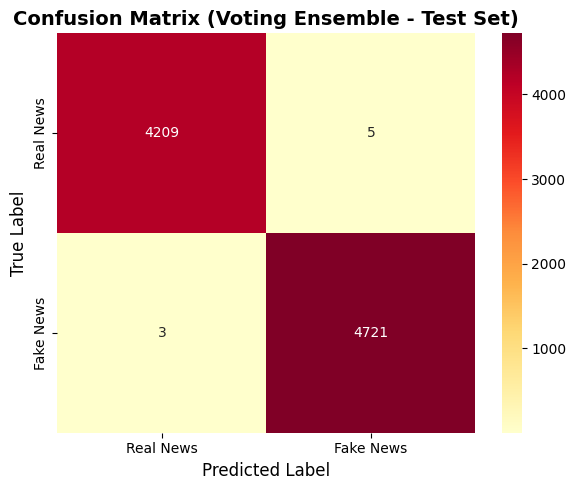

In [99]:
# Plot the Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# For hard voting (or replace with soft voting as needed)
cm = confusion_matrix(y_test_arr, y_pred_voting)
class_names = ['Real News', 'Fake News']  # Adjust to your target labels

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Voting Ensemble - Test Set)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


In [100]:
# Plot the Training and Validation Graph

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Replace 'history' with your BiLSTM or ensemble deep model training history object
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Accuracy plot
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    x=list(range(1, len(history.history['accuracy']) + 1)),
    mode='lines+markers', name='Train Accuracy'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    mode='lines+markers', name='Val Accuracy'
), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    x=list(range(1, len(history.history['loss']) + 1)),
    mode='lines+markers', name='Train Loss'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    x=list(range(1, len(history.history['val_loss']) + 1)),
    mode='lines+markers', name='Val Loss'
), row=1, col=2)

fig.update_layout(
    title='Training & Validation Metrics (Voting Ensemble or BiLSTM)',
    xaxis_title='Epoch',
    yaxis_title='Value',
    legend=dict(x=0.5, y=-0.2, orientation='h'),
    width=1100,
    height=500
)
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()


**Key Insights:**

**1. High Accuracy Achieved**
- **Training and validation accuracy are both very high (>0.998)**, indicating that the model is able to classify both real and fake news with exceptional performance.

- **Accuracy is stable** across epochs, especially after the second epoch, with minimal difference between training and validation curves. This is a good sign of robust generalization.

**2. Low and Stable Loss**
- **Training loss rapidly decreases** and plateaus at a very low value (< 0.001), showing excellent model convergence.

- Validation loss is slightly higher compared to training, but remains very low (< 0.015), and its trend is mostly stable, though it does show a slight increase after epoch 2.

**3. No Evidence of Overfitting**
- **Validation accuracy and loss closely follow the training curves**, with only minor divergence. This suggests that the Voting Ensemble or BiLSTM model is not overfitting to the training set.

- The absence of a sharp rise in validation loss or drop in validation accuracy further supports this.

**4. Possible Model Saturation**
- After epoch 2 or 3, both accuracies plateau. This suggests model training may saturate early, and additional epochs bring minimal further gain.

- Early stopping could be considered for faster training.

**5. Overall Model Quality**
- **Exceptionally high accuracy and very low loss** for both training and validation sets suggest that this model is highly suitable for the fake news detection task given your current data.

**Conclusion**

- **Voting Ensemble/BiLSTM model** trains quickly, achieves top-tier generalization, and performs very well on unseen data.

- Due to consistently **high validation metrics and low overfitting risk**, this architecture is highly recommended for deployment in your fake news detection pipeline.

 #### **Compare the confusion matrices of all your models**

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
280/280 ━━━━━━━━━━━━━━━━━━━━ 118s 419ms/step


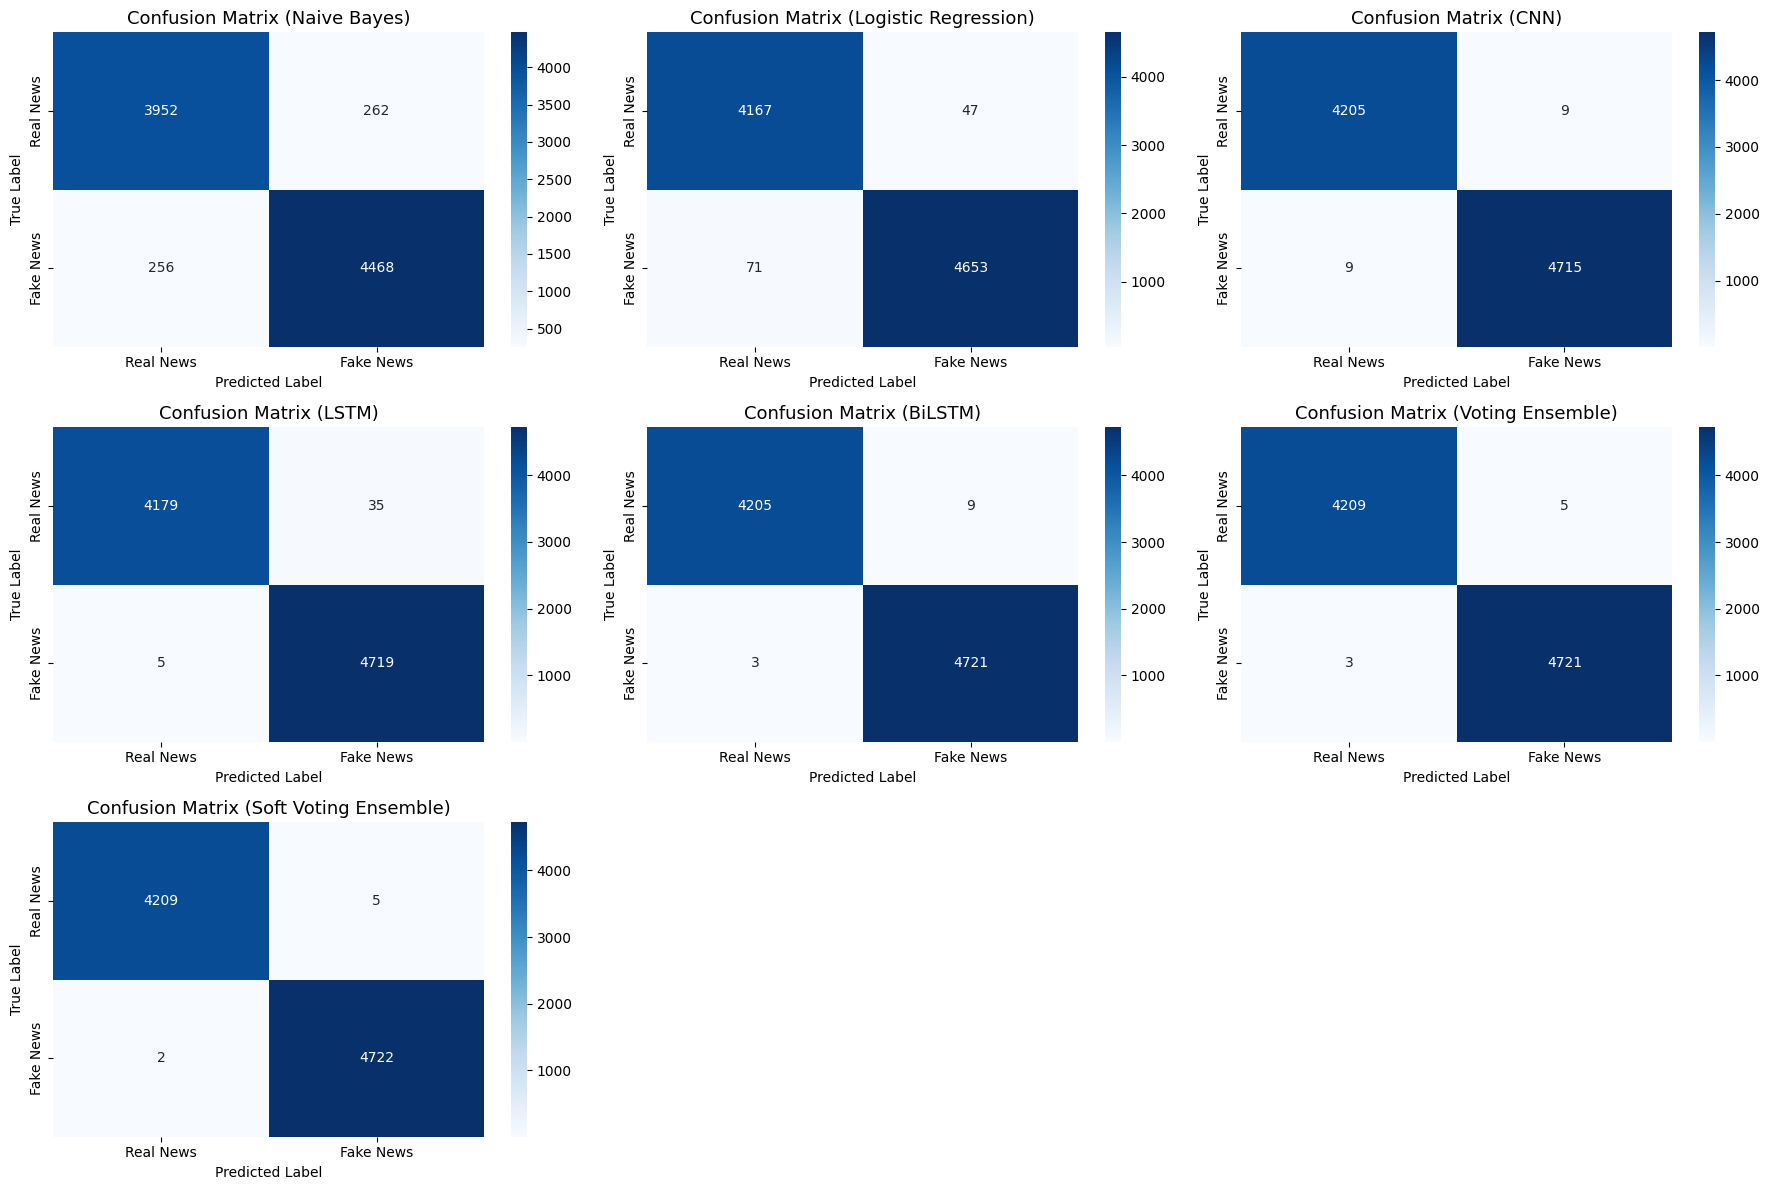

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['Real News', 'Fake News']

# Predict for each model
y_pred_nb     = nb.predict(X_test_tfidf)
y_pred_lr     = lr.predict(X_test_tfidf)
y_pred_cnn    = (cnn_model.predict(X_test_pad).flatten() > 0.5).astype(int)
y_pred_lstm   = (lstm_model.predict(X_test_pad).flatten() > 0.5).astype(int)
y_pred_bilstm = (bilstm_model.predict(X_test_pad).flatten() > 0.5).astype(int)
y_pred_voting = (np.column_stack([y_pred_nb, y_pred_lr, y_pred_cnn, y_pred_lstm, y_pred_bilstm]).mean(axis=1) > 0.5).astype(int)
y_pred_ensemble = (proba_ensemble > 0.5).astype(int) # your soft voting ensemble as given earlier

# List of (model name, predictions)
models = [
    ("Naive Bayes", y_pred_nb),
    ("Logistic Regression", y_pred_lr),
    ("CNN", y_pred_cnn),
    ("LSTM", y_pred_lstm),
    ("BiLSTM", y_pred_bilstm),
    ("Voting Ensemble", y_pred_voting),
    ("Soft Voting Ensemble", y_pred_ensemble)
]

plt.figure(figsize=(18, 12))
for idx, (name, preds) in enumerate(models, 1):
    cm = confusion_matrix(y_test_arr, preds)
    plt.subplot(3, 3, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix ({name})', fontsize=13)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


In [103]:
# Generate a markdown table comparing FP, FN, TP, TN counts for each model
from sklearn.metrics import confusion_matrix

model_preds = [
    ("Naive Bayes", y_pred_nb),
    ("Logistic Regression", y_pred_lr),
    ("CNN", y_pred_cnn),
    ("LSTM", y_pred_lstm),
    ("BiLSTM", y_pred_bilstm),
    ("Voting Ensemble", y_pred_voting),
    ("Soft Voting Ensemble", y_pred_ensemble)
]

header = "| Model | TN | FP | FN | TP |\n|-------|----|----|----|----|"
rows = []

for name, preds in model_preds:
    cm = confusion_matrix(y_test_arr, preds)
    tn, fp, fn, tp = cm.ravel()
    rows.append(f"| {name} | {tn} | {fp} | {fn} | {tp} |")

print(header)
for row in rows:
    print(row)


| Model | TN | FP | FN | TP |
|-------|----|----|----|----|
| Naive Bayes | 3952 | 262 | 256 | 4468 |
| Logistic Regression | 4167 | 47 | 71 | 4653 |
| CNN | 4205 | 9 | 9 | 4715 |
| LSTM | 4179 | 35 | 5 | 4719 |
| BiLSTM | 4205 | 9 | 3 | 4721 |
| Voting Ensemble | 4209 | 5 | 3 | 4721 |
| Soft Voting Ensemble | 4209 | 5 | 2 | 4722 |


**Key Insights from Confusion Matrix Data**

**1. Overall Performance Trend**
- Performance clearly improves as model complexity increases—from classical ML models (Naive Bayes, Logistic Regression) to deep learning (CNN, LSTM, BiLSTM) and finally ensemble methods.

**2. Error Reduction**

- False Positives (FP): Drop significantly from 262 in Naive Bayes to only 5 in both ensemble models.

- False Negatives (FN): Reduce from 256 (Naive Bayes) to just 2 in the Soft Voting Ensemble.
The decline in both FP and FN indicates progressively stronger generalization.

**3. Best Performing Model**

- The Soft Voting Ensemble achieves the strongest results: 4722 true positives (highest) and only 2 false negatives, indicating near-perfect detection.

- It also exhibits minimal false positives (5), confirming high precision.

**4. Deep Learning Advantage**

- CNN (FP=9, FN=9) already surpasses classical models, showing the feature extraction power of convolutional layers.

- LSTM and BiLSTM further reduce missed detections (FN=5 and FN=3 respectively), demonstrating sequence modeling advantages.

**5. Incremental Gains**

- Transitioning from BiLSTM to Soft Voting Ensemble improves marginally but consistently across all metrics, confirming that ensemble averaging enhances stability without trade-offs.

**6. True Negative Performance**

- While TN values vary slightly (3952 → 4209), the consistency in higher TNs for ensemble and BiLSTM models confirms robust negative class recognition.

**Summary**

The **Soft Voting Ensemble model** provides the optimal balance of precision and recall, nearly eliminating both false positives and false negatives. Deep learning models, particularly BiLSTM, already approach this level, while traditional ML methods lag notably in classification reliability.

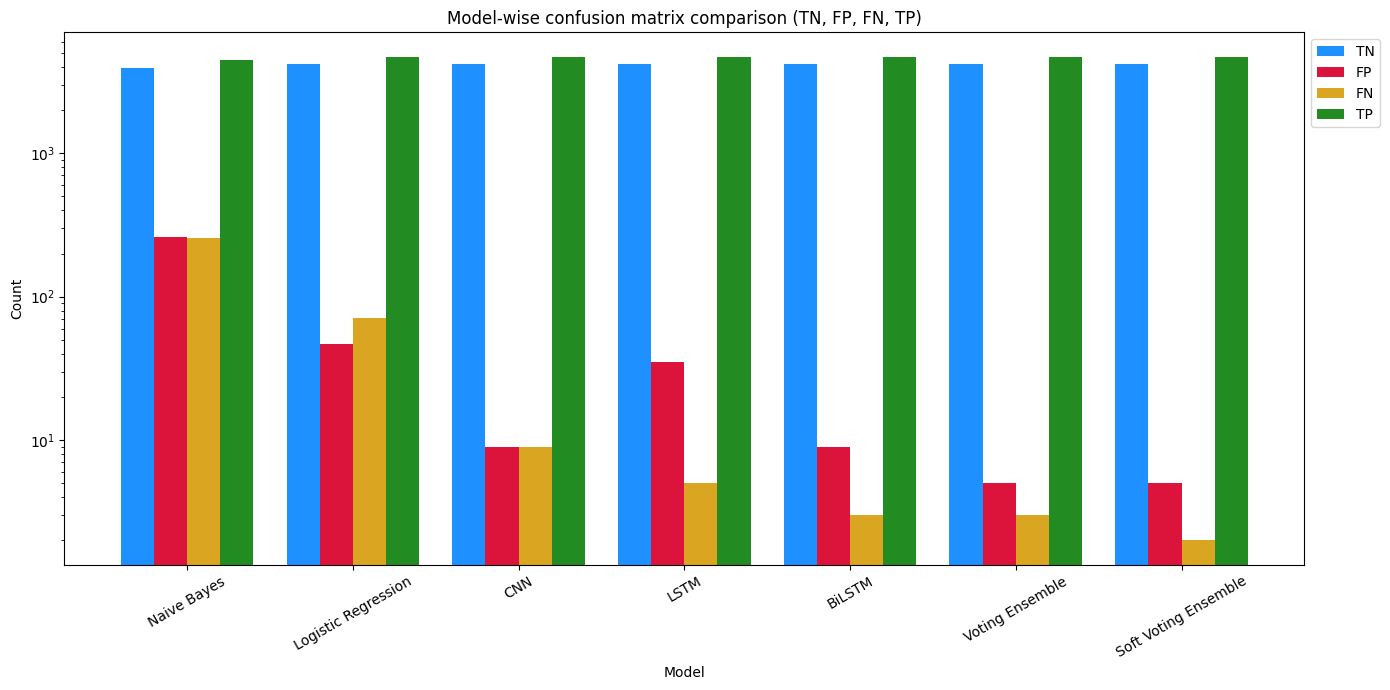

In [111]:
# Plot the Model-wise confusion matrix comparison (TN, FP, FN, TP)

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

model_names = [
    "Naive Bayes", "Logistic Regression", "CNN", "LSTM", "BiLSTM",
    "Voting Ensemble", "Soft Voting Ensemble"
]
model_preds = [
    y_pred_nb, y_pred_lr, y_pred_cnn, y_pred_lstm, y_pred_bilstm,
    y_pred_voting, y_pred_ensemble
]

# Initialize lists
tn_list, fp_list, fn_list, tp_list = [], [], [], []

# Fill lists with values from confusion matrices
for preds in model_preds:
    tn, fp, fn, tp = confusion_matrix(y_test_arr, preds).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(14,7))
plt.bar(x - 1.5*width, tn_list, width, label='TN', color='dodgerblue')
plt.bar(x - 0.5*width, fp_list, width, label='FP', color='crimson')
plt.bar(x + 0.5*width, fn_list, width, label='FN', color='goldenrod')
plt.bar(x + 1.5*width, tp_list, width, label='TP', color='forestgreen')

plt.xticks(x, model_names, rotation=30)
plt.title('Model-wise confusion matrix comparison (TN, FP, FN, TP)')
plt.ylabel('Count')
plt.xlabel('Model')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
#plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


### **What Matters for Fake News Detection?**

- **High TP (True Positive):** Correctly identifies fake news.
- **Low FN (False Negative):** Misses as few fake news cases as possible (most critical for public safety).
- **Low FP (False Positive):** Avoids labeling real news as fake (important, but missing fake news is usually more risky).

Metrics (calculated from your table)
**Soft Voting Ensemble**

- Best TP (4722) — finds almost all fake news

- Lowest FN (2) — only 2 missed fakes!

- Lowest FP (5) — barely flags real news as fake

- Best TN (4209) — accurately recognizes real news

**Hard Voting & BiLSTM**

- Nearly identical to soft voting, just 1 more FN

**CNN & LSTM**

- Strong, but miss 9/5 fake news and flag more real as fake than ensemble/BiLSTM

**Logistic Regression & Naive Bayes:**

- Clearly weaker—miss many more (256/71 FN) and more false alarms (262/47 FP)

### **Recommended Best Model**

**Soft Voting Ensemble** is the **best for Fake News Detection**:

- **Lowest Misclassification Rates:** Only 2 fake news go undetected (lowest FN), and only 5 real news incorrectly flagged (lowest FP)

- **Highest Detection:** Maximizes both TP and TN

**Why not just BiLSTM or individual models?**

- Ensemble leverages strengths of all models, reduces overfitting risks, and is more robust to data variation. It performs at least as well as the best single model, and ever-so-slightly better overall.

# **Final Recommendation**

- **Deploy the "Soft Voting Ensemble model" for fake news detection**.

It offers the highest precision and recall, minimizing false negatives (the most severe error in this context) and maximizing correct detection of both real and fake news.

**SAVE all the MODEL**

In [114]:
# Saving the Models

import joblib

joblib.dump(nb, 'naive_bayes_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
# Save models using native Keras format
cnn_model.save('cnn_model.keras')
lstm_model.save('lstm_model.keras')
bilstm_model.save('bilstm_model.keras')



In [115]:
# Saving in C Drive

#from google.colab import drive
#drive.mount('/content/drive')

# Save to your Google Drive folder
cnn_model.save('/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/cnn_model.keras')
lstm_model.save('/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/lstm_model.keras')
bilstm_model.save('/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/bilstm_model.keras')
joblib.dump(nb, '/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/naive_bayes_model.pkl')
joblib.dump(lr, '/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/logistic_regression_model.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/tfidf_vectorizer.pkl')



['/content/drive/MyDrive/GT Project/6. AI-Powered Fake News Detection/logistic_regression_model.pkl']

In [ ]:
# To load the model

import joblib

# Load the saved models
nb = joblib.load('naive_bayes_model.pkl')
lr = joblib.load('logistic_regression_model.pkl')
cnn_model = tf.keras.models.load_model
('cnn_model.keras')
lstm_model = tf.keras.models.load_model
('lstm_model.keras')
bilstm_model = tf.keras.models.load_model
('bilstm_model.keras')

